In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
    R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
    SZ = nc_fid.variables["satellite_zenith"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return R1, R2, SZ, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

def read_radar_vel(ncf):
    nc_fid = Dataset(ncf, 'r')
    V = nc_fid.variables["RadialVelocity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return V, lat, lon, names

def make_radar_mask(Z,lat,lon):
    Z[Z>70]=69
    print('Z shape', Z.shape, Z)
    Z_30 = ma.masked_where(Z < 30, Z)
    print('Z_30 shape', Z_30.shape)
    Z_40 = ma.masked_where(Z < 40, Z)
    print('Z_40 shape', Z_40.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return Z_30, Z_40, lonz, latz

Z_file_DVN = 'KDVN_Z_20120629_162232.nc'
Z_DVN, lat_dvn, lon_dvn, names = read_radar_plot(Z_file_DVN)
Z_DVN = Z_DVN[0,:,:]
Z_DVN = np.nan_to_num(Z_DVN)
print(names)
print('Z_DVN shape', Z_DVN.shape, Z_DVN)
Z_DVN_max = np.amax(Z_DVN)
Z_DVN_min = np.amin(Z_DVN)
print('Z_DVN min, Z_DVN max', Z_DVN_min, Z_DVN_max)
print('lat shape, lon shape', lat_dvn.shape, lon_dvn.shape)

Z_30_DVN, Z_40_DVN, lonz_dvn, latz_dvn = make_radar_mask(Z_DVN, lat_dvn, lon_dvn) 

Z_file_IWX = 'KIWX_Z_20120629_185459.nc'
Z_IWX, lat_iwx, lon_iwx, names = read_radar_plot(Z_file_IWX)
Z_IWX = Z_IWX[0,:,:]
Z_IWX = np.nan_to_num(Z_IWX)
print(names)
print('Z_IWX shape', Z_IWX.shape, Z_IWX)
Z_IWX_max = np.amax(Z_IWX)
Z_IWX_min = np.amin(Z_IWX)
print('Z_IWX min, Z_IWX max', Z_IWX_min, Z_IWX_max)
print('lat shape, lon shape', lat_iwx.shape, lon_iwx.shape)

Z_30_IWX, Z_40_IWX, lonz_iwx, latz_iwx = make_radar_mask(Z_IWX, lat_iwx, lon_iwx) 

Z_file_ILN = 'KILN_V03_20120629_220340.nc'
Z_ILN, lat_iln, lon_iln, names = read_radar_plot(Z_file_ILN)
Z_ILN = Z_ILN[0,:,:]
Z_ILN = np.nan_to_num(Z_ILN)
print(names)
print('Z_ILN shape', Z_ILN.shape, Z_ILN)
Z_ILN_max = np.amax(Z_ILN)
Z_ILN_min = np.amin(Z_ILN)
print('Z_ILN min, Z_ILN max', Z_ILN_min, Z_ILN_max)
print('lat shape, lon shape', lat_iln.shape, lon_iln.shape)

Z_30_ILN, Z_40_ILN, lonz_iln, latz_iln = make_radar_mask(Z_ILN, lat_iln, lon_iln) 

Z_file_LWX = 'KLWX_V06_20120630_020528.nc'
Z_LWX, lat_lwx, lon_lwx, names = read_radar_plot(Z_file_LWX)
Z_LWX = Z_LWX[0,:,:]
Z_LWX = np.nan_to_num(Z_LWX)
print(names)
print('Z_LWX shape', Z_LWX.shape, Z_LWX)
Z_LWX_max = np.amax(Z_LWX)
Z_LWX_min = np.amin(Z_LWX)
print('Z_LWX min, Z_LWX max', Z_LWX_min, Z_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

Z_30_LWX, Z_40_LWX, lonz_lwx, latz_lwx = make_radar_mask(Z_LWX, lat_lwx, lon_lwx) 

V_file = 'KLOT_V_cappi_3km_20120629_162431.nc'
V_LOT, lat_lot, lon_lot, names = read_radar_vel(V_file)
V_LOT = V_LOT[0,0,:,:]
V_LOT = np.nan_to_num(V_LOT)
print(names)
print('V LOT shape', V_LOT.shape, V_LOT)
V_LOT_max = np.amax(V_LOT)
V_LOT_min = np.amin(V_LOT)
print('V min, V max', V_LOT_min, V_LOT_max)
lon_lot_min = np.amin(lon_lot)
lon_lot_max = np.amax(lon_lot)
lon_lot_405 = lon_lot[405]
print('Lon min, max, x = 405', lon_lot_min, lon_lot_max, lon_lot_405)
print('lat shape, lon shape', lat_lot.shape, lon_lot.shape)

shape = V_LOT.shape
V_deal_lot = np.zeros((587, 813))
print('V_deal_0s LOT', V_deal_lot)
for y in range(0, 406):
    for x in range(0, 586):
        if V_LOT[x, y] > 30:
            V_deal_lot[x, y] = V_LOT_max + (V_LOT_max - V_LOT[x, y])
        else:
            V_deal_lot[x, y] = V_LOT[x, y]

for y in range(406, 812):
    for x in range(0, 586):
        V_deal_lot[x, y] = V_LOT[x, y]
            
V_deal_lot=np.absolute(V_deal_lot)
print('V_deal LOT shape', V_deal_lot.shape, V_deal_lot)
V_deal_lot_max = np.amax(V_deal_lot)
V_deal_lot_min = np.amin(V_deal_lot)
print('V_deal min, V_deal max', V_deal_lot_min, V_deal_lot_max)

V_20_LOT = ma.masked_where(V_deal_lot < 20, V_deal_lot)
print('V_20 LOT shape', V_20_LOT.shape)
lonv_lot,latv_lot = np.meshgrid(lon_lot,lat_lot)
print('lats shape, lons shape', latv_lot.shape, lonv_lot.shape, latv_lot,lonv_lot)

V_file = 'KIWX_V_cappi_3km_20120629_185459.nc'
V_IWX, lat_iwx, lon_iwx, names = read_radar_vel(V_file)
V_IWX = V_IWX[0,0,:,:]
V_IWX = np.nan_to_num(V_IWX)
print(names)
print('V IWX shape', V_IWX.shape, V_IWX)
V_IWX_max = np.amax(V_IWX)
V_IWX_min = np.amin(V_IWX)
print('V min, V max', V_IWX_min, V_IWX_max)
lon_iwx_min = np.amin(lon_iwx)
lon_iwx_max = np.amax(lon_iwx)
lon_iwx_403 = lon_iwx[403]
print('Lon min, max, x = 403', lon_iwx_min, lon_iwx_max, lon_iwx_403)
print('lat shape, lon shape', lat_iwx.shape, lon_iwx.shape)

shape = V_IWX.shape
V_deal_iwx = np.zeros((587, 810))
print('V_deal_0s IWX', V_deal_iwx)
V_deal_iwx = V_IWX
for y in range(0, 404):
    for x in range(0, 586):
        if V_IWX[x, y] > 30:
            V_deal_iwx[x, y] = V_IWX_max + (V_IWX_max - V_IWX[x, y])
        else:
            V_deal_iwx[x, y] = V_IWX[x, y]

for y in range(404, 809):
    for x in range(0, 586):
        if V_IWX[x, y] < -20:
            V_deal_iwx[x, y] = V_IWX_max + (V_IWX_max - np.absolute(V_IWX[x, y]))
        else:
            V_deal_iwx[x, y] = V_IWX[x, y]
        
V_deal_iwx=np.absolute(V_deal_iwx)
print('V_deal IWX shape', V_deal_iwx.shape, V_deal_iwx)
V_deal_iwx_max = np.amax(V_deal_iwx)
V_deal_iwx_min = np.amin(V_deal_iwx)
print('V_deal min, V_deal max', V_deal_iwx_min, V_deal_iwx_max)

V_20_IWX = ma.masked_where(V_deal_iwx < 20, V_deal_iwx)
print('V_20 IWX shape', V_20_IWX.shape)
lonv_iwx,latv_iwx = np.meshgrid(lon_iwx,lat_iwx)
print('lats shape, lons shape', latv_iwx.shape, lonv_iwx.shape, latv_iwx, lonv_iwx)

V_file = 'KILN_V_cappi_3km_20120629_220340.nc'
V_ILN, lat_iln, lon_iln, names = read_radar_vel(V_file)
V_ILN = V_ILN[0,0,:,:]
V_ILN = np.nan_to_num(V_ILN)
print(names)
print('V ILN shape', V_ILN.shape, V_ILN)
V_ILN_max = np.amax(V_ILN)
V_ILN_min = np.amin(V_ILN)
print('V min, V max', V_ILN_min, V_ILN_max)
lon_iln_min = np.amin(lon_iln)
lon_iln_max = np.amax(lon_iln)
lon_iln_392 = lon_iln[392]
print('Lon min, max, x = 392', lon_iln_min, lon_iln_max, lon_iln_392)
print('lat shape, lon shape', lat_iln.shape, lon_iln.shape)

shape = V_ILN.shape
V_deal_iln = np.zeros((587,785))
print('V_deal_0s ILN', V_deal_iln)
V_deal_iln = V_ILN

for y in range(0, 393):
    for x in range(0, 586):
        if V_ILN[x, y] > 30:
            V_deal_iln[x, y] = V_ILN_max + (V_ILN_max - V_ILN[x, y])
        else:
            V_deal_iln[x, y] = V_ILN[x, y]

for y in range(393, 784):
    for x in range(0, 586):
        if V_ILN[x, y] < -40:
            V_deal_iln[x, y] = V_ILN_max + (V_ILN_max - np.absolute(V_ILN[x, y]))
        else:
            V_deal_iln[x, y] = V_ILN[x, y]

V_deal_iln=np.absolute(V_deal_iln)
print('V_deal shape', V_deal_iln.shape, V_deal_iln)
V_deal_iln_max = np.amax(V_deal_iln)
V_deal_iln_min = np.amin(V_deal_iln)
print('V_deal min, V_deal max', V_deal_iln_min, V_deal_iln_max)

V_20_ILN = ma.masked_where(V_deal_iln < 20, V_deal_iln)
print('V_20 shape', V_20_ILN.shape)
lonv_iln,latv_iln = np.meshgrid(lon_iln,lat_iln)
print('lats shape, lons shape', latv_iln.shape, lonv_iln.shape, latv_iln, lonv_iln)

V_file = 'KLWX_V_cappi_3km_20120630_020528.nc'
V_LWX, lat_lwx, lon_lwx, names = read_radar_vel(V_file)
V_LWX = V_LWX[0,0,:,:]
V_LWX = np.nan_to_num(V_LWX)
print(names)
print('V shape', V_LWX.shape, V_LWX)
V_LWX_max = np.amax(V_LWX)
V_LWX_min = np.amin(V_LWX)
print('V min, V max', V_LWX_min, V_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

shape = V_LWX.shape
V_deal_lwx = np.zeros((587,780))
print('V_deal_0s LWX', V_deal_lwx)
V_deal_lwx = V_LWX

for y in range(0, 390):
    for x in range(0, 586):
        if V_LWX[x, y] > 20:
            V_deal_lwx[x, y] = V_LWX_max + (V_LWX_max - V_LWX[x, y])
        else:
            V_deal_lwx[x, y] = V_LWX[x, y]

V_deal_lwx=np.absolute(V_deal_lwx)
print('V_deal shape', V_deal_lwx.shape, V_deal_lwx)
V_deal_lwx_max = np.amax(V_deal_lwx)
V_deal_lwx_min = np.amin(V_deal_lwx)
print('V_deal min, V_deal max', V_deal_lwx_min, V_deal_lwx_max)

V_20_LWX = ma.masked_where(V_deal_lwx < 20, V_deal_lwx)
print('V_20 shape', V_20_LWX.shape)
lonv_lwx,latv_lwx = np.meshgrid(lon_lwx,lat_lwx)
print('lats shape, lons shape', latv_lwx.shape, lonv_lwx.shape, latv_lwx, lonv_lwx)

MHS_file1 = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20120629161855_29550_eps_o_l1.nc'
R1, R2, SZ, lats, lons, names = read_MHS_plot(MHS_file1)
SZ_5 = ma.masked_where(SZ > 5.0, SZ)
print('SZ_5 shape', SZ_5.shape)
R1_kw = R1 * 1000
R1_kwmn = np.mean(R1_kw)
R2_kw = R2 * 1000
R2_kwmn = np.mean(R2_kw)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("R1 mean = ", R1_kwmn)
print("R2 mean = ", R1_kwmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
R1_max = np.amax(R1_kw) 
R1_min = np.amin(R1_kw)
print("R1 max =", R1_max)
print("R1 min =", R1_min)
print("R1 = ", R1_kw, R1_kw.shape)
R2_max = np.amax(R2_kw)
R2_min = np.amin(R2_kw)
print("R2 max =", R2_max)
print("R2 min =", R2_min)
print("R2 = ", R2_kw, R2_kw.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

MHS_file2 = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20120630020055_29555_eps_o_l1.nc'
R2_1, R2_2, SZ2, lats2, lons2, names = read_MHS_plot(MHS_file2)
SZ2_5 = ma.masked_where(SZ2 > 5.0, SZ2)
print('SZ_5 shape', SZ_5.shape)
lats2_mn = np.mean(lats2)
lons2_mn = np.mean(lons2)
print("Lats mean= ", lats2_mn)
print("Lons mean= ", lons2_mn)
print("Lats = ", lats2, lats2.shape)
print("Lons = ", lons2, lons2.shape)

/tmp/ipykernel_365/2056156658.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_365/2056156658.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_365/2056156658.py:19: DeprecationWarni

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_DVN shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_DVN min, Z_DVN max -23.5 62.5
lat shape, lon shape (587,) (813,)
Z shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (587, 813)
Z_40 shape (587, 813)
lats shape, lons shape (587, 813) (587, 813) [[39.37711678 39.37711678 39.37711678 ... 39.37711678 39.37711678
  39.37711678]
 [39.38462574 39.38462574 39.38462574 ... 39.38462574 39.38462574
  39.38462574]
 [39.39213471 39.39213471 39.39213471 ... 39.39213471 39.39213471
  39.39213471]
 ...
 [43.76235299 43.76235299 43.76235299 ... 43.76235299 43.76235299
  43.76235299]
 [43.76986196 43.76986196 43.76986196 ... 43.76986196 43.76986196
  43.76986196]
 [43.77737093 43.77737093 43.7

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_LWX shape (673, 1122) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_LWX min, Z_LWX max -17.0 63.0
lat shape, lon shape (673,) (1122,)
Z shape (673, 1122) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (673, 1122)
Z_40 shape (673, 1122)
lats shape, lons shape (673, 1122) (673, 1122) [[36.41346255 36.41346255 36.41346255 ... 36.41346255 36.41346255
  36.41346255]
 [36.42097364 36.42097364 36.42097364 ... 36.42097364 36.42097364
  36.42097364]
 [36.42848474 36.42848474 36.42848474 ... 36.42848474 36.42848474
  36.42848474]
 ...
 [41.44589658 41.44589658 41.44589658 ... 41.44589658 41.44589658
  41.44589658]
 [41.45340767 41.45340767 41.45340767 ... 41.45340767 41.45340767
  41.45340767]
 [41.46091877 41.460918

/tmp/ipykernel_365/2056156658.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = nc_fid.variables["RadialVelocity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_365/2056156658.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_365/2056156658.py:28: DeprecationWar

V_deal LOT shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
V_deal min, V_deal max 0.0 61.23109817504883
V_20 LOT shape (587, 813)
lats shape, lons shape (587, 813) (587, 813) [[39.36577267 39.36577267 39.36577267 ... 39.36577267 39.36577267
  39.36577267]
 [39.37328038 39.37328038 39.37328038 ... 39.37328038 39.37328038
  39.37328038]
 [39.38078809 39.38078809 39.38078809 ... 39.38078809 39.38078809
  39.38078809]
 ...
 [43.75027682 43.75027682 43.75027682 ... 43.75027682 43.75027682
  43.75027682]
 [43.75778453 43.75778453 43.75778453 ... 43.75778453 43.75778453
  43.75778453]
 [43.76529224 43.76529224 43.76529224 ... 43.76529224 43.76529224
  43.76529224]] [[-91.13660517 -91.12909746 -91.12158974 ... -85.05535797 -85.04785026
  -85.04034254]
 [-91.13660517 -91.12909746 -91.12158974 ... -85.05535797 -85.04785026
  -85.04034254]
 [-91.13660517 -91.12909746 -91.12

V_deal IWX shape (587, 810) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 117.60258674621582
V_20 IWX shape (587, 810)
lats shape, lons shape (587, 810) (587, 810) [[39.11903458 39.11903458 39.11903458 ... 39.11903458 39.11903458
  39.11903458]
 [39.12653828 39.12653828 39.12653828 ... 39.12653828 39.12653828
  39.12653828]
 [39.13404197 39.13404197 39.13404197 ... 39.13404197 39.13404197
  39.13404197]
 ...
 [43.50119313 43.50119313 43.50119313 ... 43.50119313 43.50119313
  43.50119313]
 [43.50869683 43.50869683 43.50869683 ... 43.50869683 43.50869683
  43.50869683]
 [43.51620052 43.51620052 43.51620052 ... 43.51620052 43.51620052
  43.51620052]] [[-88.73899694 -88.73149324 -88.72398955 ... -82.68351415 -82.67601045
  -82.66850676]
 [-88.73899694 -88.73149324 -88.72398955 ... -82.68351415 -82.67601045
  -82.6685067

V_deal shape (587, 785) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 85.52915573120117
V_20 shape (587, 785)
lats shape, lons shape (587, 785) (587, 785) [[37.18391178 37.18391178 37.18391178 ... 37.18391178 37.18391178
  37.18391178]
 [37.19141903 37.19141903 37.19141903 ... 37.19141903 37.19141903
  37.19141903]
 [37.19892628 37.19892628 37.19892628 ... 37.19892628 37.19892628
  37.19892628]
 ...
 [41.56814559 41.56814559 41.56814559 ... 41.56814559 41.56814559
  41.56814559]
 [41.57565284 41.57565284 41.57565284 ... 41.57565284 41.57565284
  41.57565284]
 [41.58316009 41.58316009 41.58316009 ... 41.58316009 41.58316009
  41.58316009]] [[-86.7682655  -86.76075825 -86.753251   ... -80.89759625 -80.890089
  -80.88258175]
 [-86.7682655  -86.76075825 -86.753251   ... -80.89759625 -80.890089
  -80.88258175]
 [-86.7682

V_deal shape (587, 780) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 78.7257022857666
V_20 shape (587, 780)
lats shape, lons shape (587, 780) (587, 780) [[36.73915911 36.73915911 36.73915911 ... 36.73915911 36.73915911
  36.73915911]
 [36.74666216 36.74666216 36.74666216 ... 36.74666216 36.74666216
  36.74666216]
 [36.75416521 36.75416521 36.75416521 ... 36.75416521 36.75416521
  36.75416521]
 ...
 [41.12094134 41.12094134 41.12094134 ... 41.12094134 41.12094134
  41.12094134]
 [41.12844439 41.12844439 41.12844439 ... 41.12844439 41.12844439
  41.12844439]
 [41.13594744 41.13594744 41.13594744 ... 41.13594744 41.13594744
  41.13594744]] [[-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.4

/tmp/ipykernel_365/2056156658.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
/tmp/ipykernel_365/2056156658.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
/tmp/ipykernel_365/2056156658.py:8: Deprecat

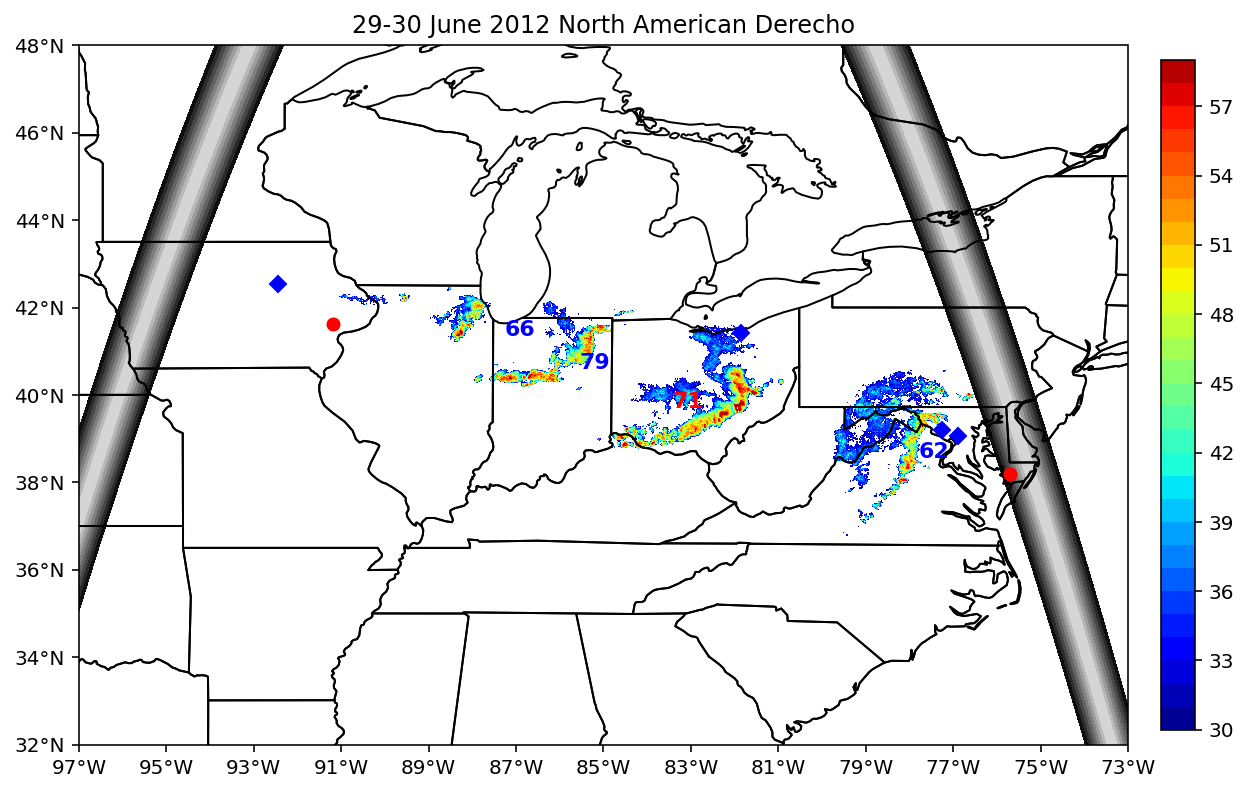

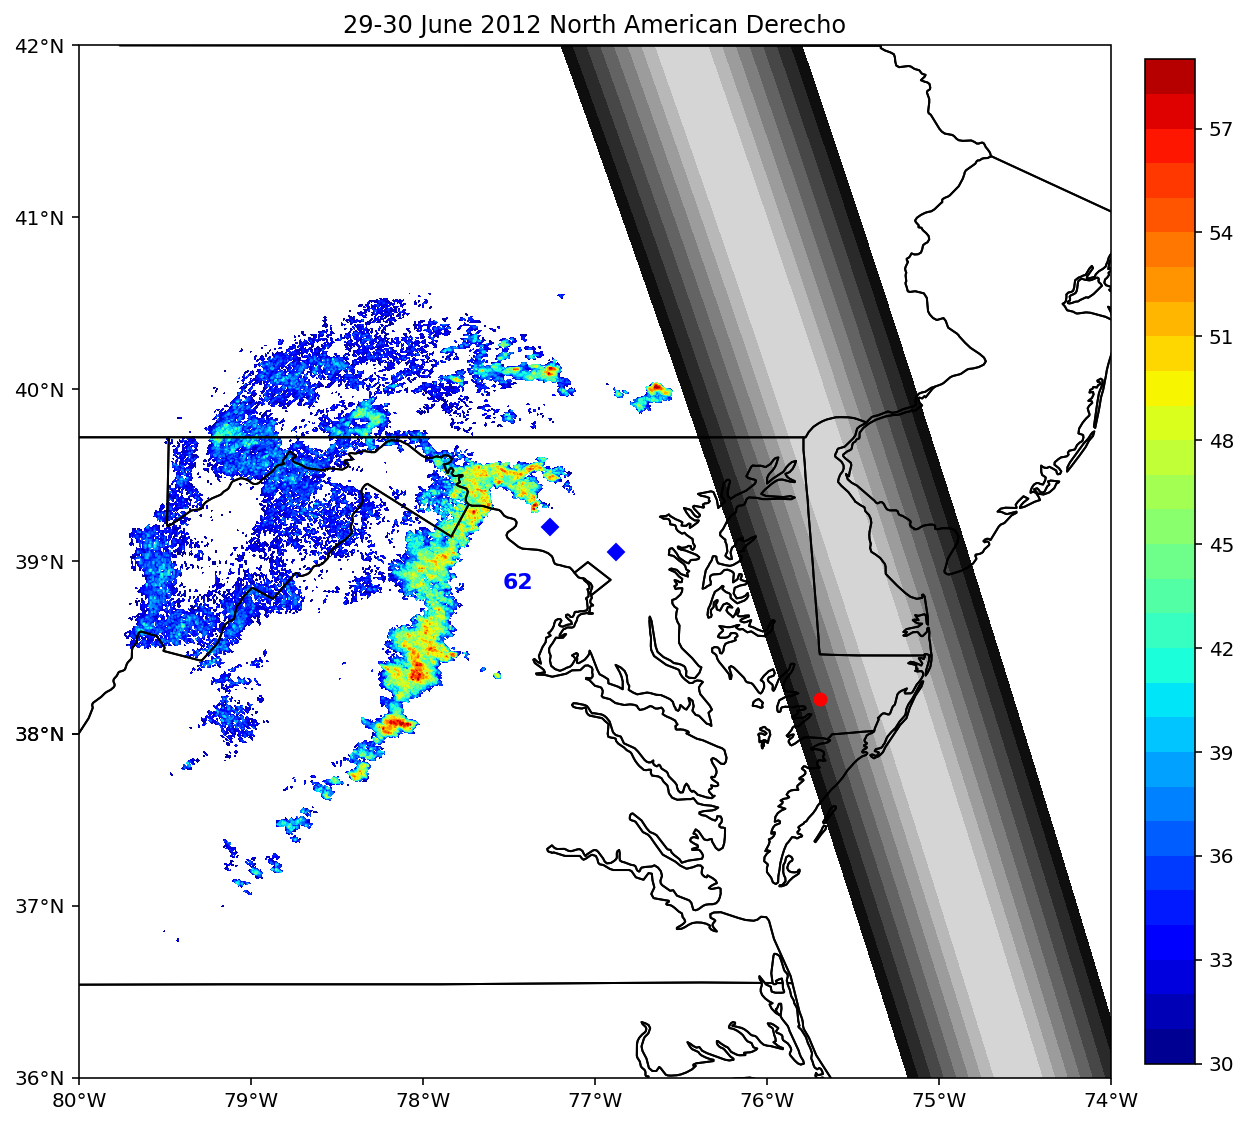

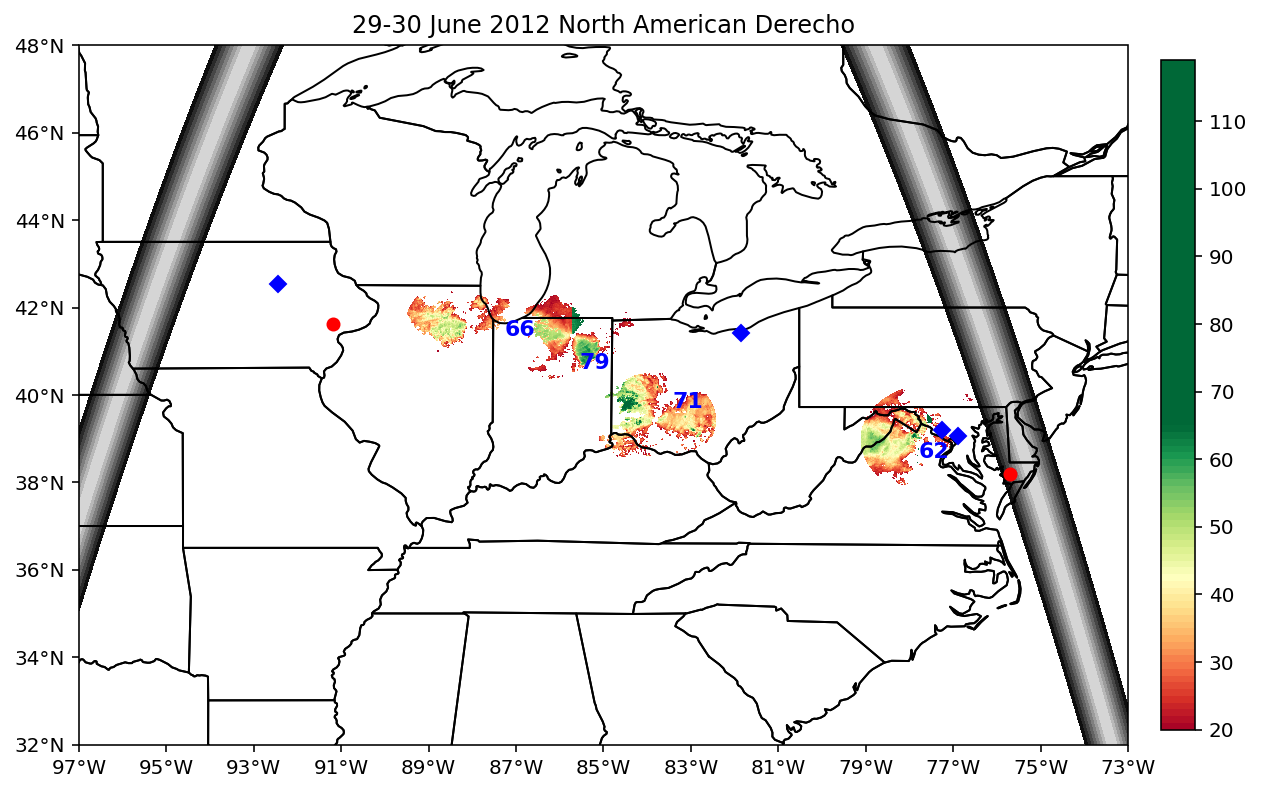

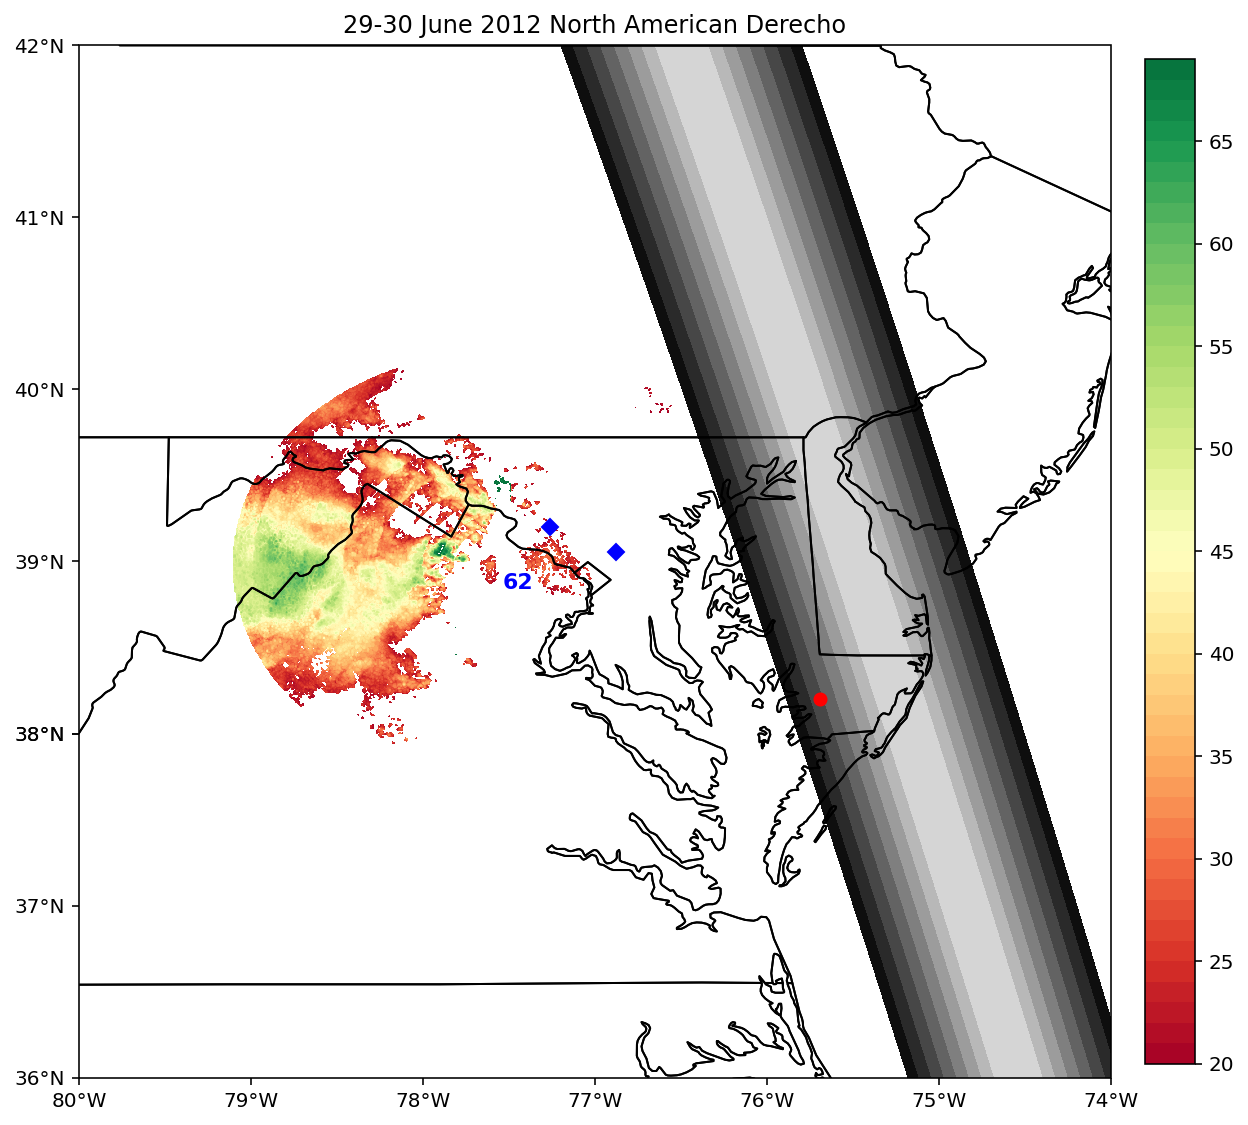

In [3]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -73, 32, 48)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -73, 32, 48], crs.PlateCarree(globe=None))

plt.title('29-30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz1 = ax.contourf(lons,lats,SZ_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Zlevels = np.arange(30,60,1)
cZ1 = ax.contourf(lonz_dvn,latz_dvn,Z_30_DVN,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ2 = ax.contourf(lonz_iwx,latz_iwx,Z_30_IWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ3 = ax.contourf(lonz_iln,latz_iln,Z_30_ILN,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ4 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85,-83,-81,-79,-77,-75,-73])
ax.set_yticks([32,34,36,38,40,42,44,46,48])   

ax.plot(-92.445316, 42.534899, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'or', markersize=6, transform=crs.Geodetic())
ax.plot(-81.8621, 41.41398, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-86.912, 41.729, '66', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())  
ax.text(-85.20637, 40.97251, '79', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-83.07806, 40.07806, '71', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ1,fraction=0.03,pad=0.03)
plt.savefig("map_nad_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-80, -74, 36, 42)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-80, -74, 36, 42], crs.PlateCarree(globe=None))

plt.title('29-30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Zlevels = np.arange(30,60,1)
cZ4 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-80,-79,-78,-77,-76,-75,-74])
ax.set_yticks([36,37,38,38,39,40,41,42])   

ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ4,fraction=0.045,pad=0.03)
plt.savefig("map_nad_lwx_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -73, 32, 48)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -73, 32, 48], crs.PlateCarree(globe=None))

plt.title('29-30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz1 = ax.contourf(lons,lats,SZ_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Vlevels = np.arange(20,120,1)
cV1 = ax.contourf(lonv_lot,latv_lot,V_20_LOT,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=20,vmax=65)
cV2 = ax.contourf(lonv_iwx,latv_iwx,V_20_IWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=20,vmax=120)
cV3 = ax.contourf(lonv_iln,latv_iln,V_20_ILN,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=20,vmax=70)
cV4 = ax.contourf(lonv_lwx,latv_lwx,V_20_LWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=20,vmax=70)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85,-83,-81,-79,-77,-75,-73])
ax.set_yticks([32,34,36,38,40,42,44,46,48])   

ax.plot(-92.445316, 42.534899, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'or', markersize=6, transform=crs.Geodetic())
ax.plot(-81.8621, 41.41398, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-86.912, 41.729, '66', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())  
ax.text(-85.20637, 40.97251, '79', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-83.07806, 40.07806, '71', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cV1,fraction=0.03,pad=0.03)
plt.savefig("map_nad_V_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-80, -74, 36, 42)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-80, -74, 36, 42], crs.PlateCarree(globe=None))

plt.title('29-30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Vlevels = np.arange(20,70,1)
cV4 = ax.contourf(lonv_lwx,latv_lwx,V_20_LWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=20,vmax=70)
ax.set_xticks([-80,-79,-78,-77,-76,-75,-74])
ax.set_yticks([36,37,38,38,39,40,41,42])   

ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cV4,fraction=0.045,pad=0.03)
plt.savefig("map_nad_V_lwx_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()